<a href="https://colab.research.google.com/github/Ratna-Babu/Handwritten-Digit-Classification-using-CNN/blob/main/Handwritten_Digit_Classification_usingCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
import tensorflow as tf

# MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Invert the colors of the images
x_train = 255 - x_train
x_test = 255 - x_test


In [38]:
# Preprocessing the Images
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Reshape the images to include the channel dimension
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [41]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [42]:
model.fit(x_train, y_train, epochs=10, batch_size=200, validation_split=0.2)
model.save('mnist_cnn.h5')

Epoch 1/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 43s 172ms/step - accuracy: 0.7724 - loss: 0.8053 - val_accuracy: 0.9712 - val_loss: 0.1000
Epoch 2/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 84s 182ms/step - accuracy: 0.9743 - loss: 0.0876 - val_accuracy: 0.9808 - val_loss: 0.0661
Epoch 3/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 80s 175ms/step - accuracy: 0.9824 - loss: 0.0582 - val_accuracy: 0.9828 - val_loss: 0.0564
Epoch 4/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 82s 173ms/step - accuracy: 0.9860 - loss: 0.0475 - val_accuracy: 0.9852 - val_loss: 0.0504
Epoch 5/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 82s 172ms/step - accuracy: 0.9886 - loss: 0.0365 - val_accuracy: 0.9872 - val_loss: 0.0455
Epoch 6/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 42s 174ms/step - accuracy: 0.9912 - loss: 0.0285 - val_accuracy: 0.9868 - val_loss: 0.0439
Epoch 7/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 82s 175ms/step - accuracy: 0.9926 - loss: 0.0225 - val_accuracy: 0.9868 - val_loss: 0.0452
Epoch 8/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 82s 174ms/step - accuracy: 0.9936 - loss: 0

In [44]:
score = model.evaluate(x_test, y_test, verbose=0)
print(f'Test accuracy: {score[1]:.4f}')

Test accuracy: 0.9891


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


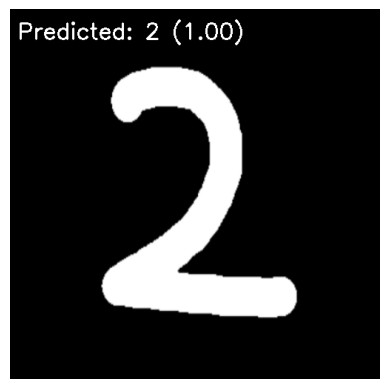

Predicted digit: 2


In [89]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from PIL import Image
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the trained model
model = load_model('mnist_cnn.h5')

def predict_digit(image_path):
    try:
        # Load and preprocess the image
        img = Image.open(image_path).convert('L')
        img = img.resize((28, 28))
        img_array = np.array(img)
        img_array = 255 - img_array
        img_array = img_array.astype('float32') / 255.0
        img_array = img_array.reshape(1, 28, 28, 1)

        # Make the prediction
        prediction = model.predict(img_array)
        predicted_digit = np.argmax(prediction)
        confidence = np.max(prediction)

        display_prediction(image_path, predicted_digit, confidence)

        return predicted_digit

    except FileNotFoundError:
        print(f"Error: Image file not found at {image_path}")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

def display_prediction(image_path, digit, confidence):
    img = cv2.imread(image_path)

    img_resized = cv2.resize(img, (500, 500))

    img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)

    label = f'Predicted: {digit} ({confidence:.2f})'
    cv2.putText(img_rgb, label, (10, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()

image_path = '2.png'  # Replace with the actual path to your image
predicted_digit = predict_digit(image_path)

if predicted_digit is not None:
    print(f"Predicted digit: {predicted_digit}")
